# Finding Keywords in Amazon Product Titles

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("white")
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
# loading the data
amazon_data = pd.read_csv('clean_amazon_data.csv')
amazon_data = amazon_data[['category', 'title']]

In [4]:
# formatting the categories
amazon_data['category'] = amazon_data['category'].str.replace("'",'')
amazon_data['category'] = amazon_data['category'].str.replace("[",'')
amazon_data['category'] = amazon_data['category'].str.replace("]",'')
amazon_data['category'] = amazon_data['category'].str.replace(", ",',')

In [5]:
# separating all the product categories and storing them in a list
cats = []
for i in range (9972):
    cat_list = amazon_data['category'][i]
    cats.append(cat_list.split(","))

categories = []
for i in range (len(cats)):
    cat_list = cats[i]
    for j in range(len(cat_list)):
        categories.append(cat_list[j])

<AxesSubplot:xlabel='count', ylabel='Categories'>

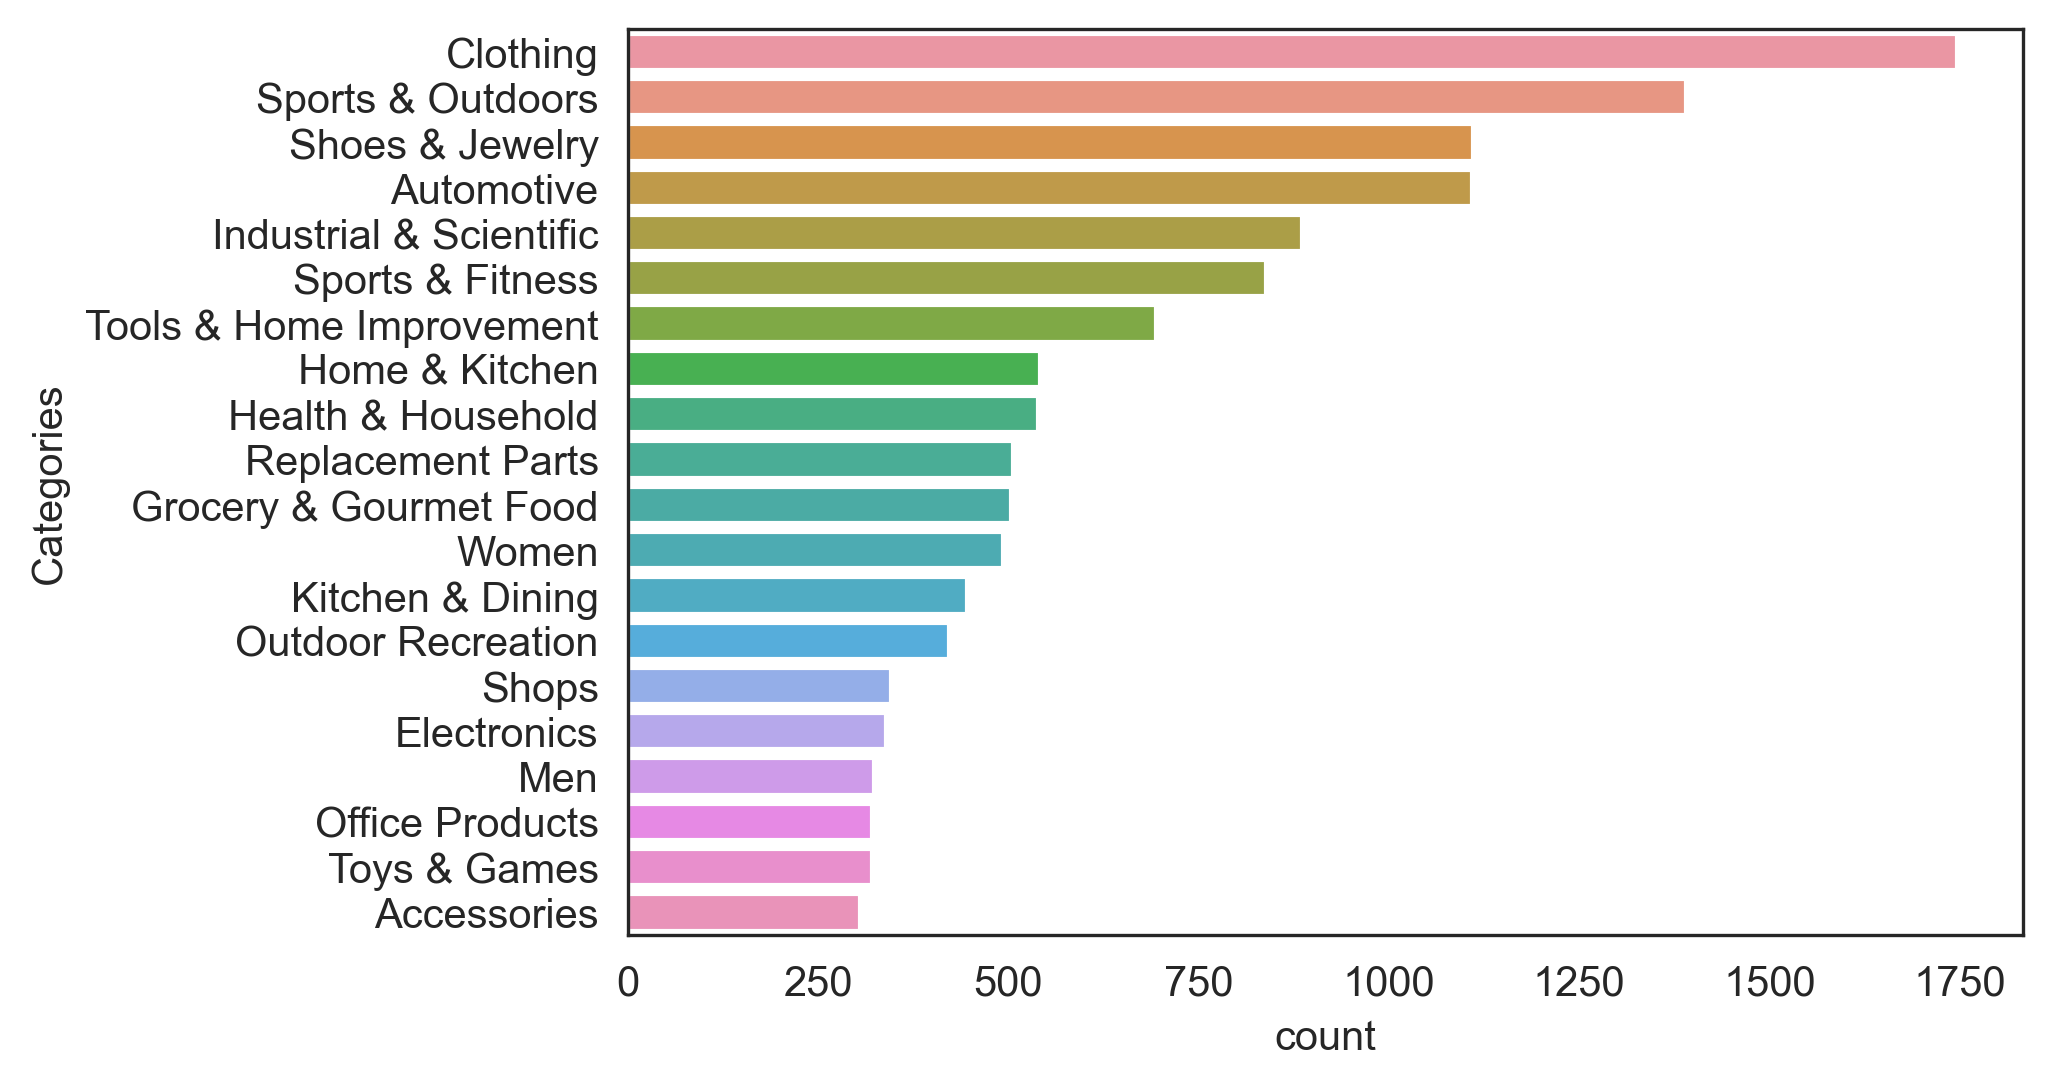

In [6]:
df = pd.DataFrame({'Categories':categories})

plt.figure(dpi=300)
sns.countplot(y="Categories", data=df, order=df.Categories.value_counts().iloc[:20].index)

In [7]:
# function to list the titles of products within a certain category
def cat_prods(cat):
    prod_title = []
    for i in range (9972):
        ctgry = amazon_data['category'][i]
        cat_list = ctgry.split(",")
        for j in range(len(cat_list)):
            if cat_list[j] == cat:
                prod_title.append(amazon_data['title'][i])
    df = pd.DataFrame({'title':prod_title})
    df = df.drop_duplicates()
    df = df.reset_index(drop=True)
    return df['title']

In [8]:
stopwords = set(STOPWORDS)
stopwords.add("men")
stopwords.add("mens")
stopwords.add("women")
stopwords.add("womens")
stopwords.add("kid")
stopwords.add("kids")
stopwords.add("girl")
stopwords.add("girls")
stopwords.add("boy")
stopwords.add("boys")
stopwords.add("pack")
stopwords.add("inch")
stopwords.add("inches")
stopwords.add("black")
stopwords.add("x")
stopwords.add("oz")
stopwords.add("ounce")
stopwords.add("lb")
stopwords.add("pound")
stopwords.add("set")
stopwords.add("white")
stopwords.add("blue")
stopwords.add("red")
stopwords.add("kit")
stopwords.add("tool")
stopwords.add("fit")

def getKeyword(col):
    comment_words = ''
    for val in col:
        tokens = val.split() 
        for i in range(len(tokens)): 
            tokens[i] = tokens[i].lower() 
        comment_words += " ".join(tokens)+" "
    return comment_words

In [9]:
from wordcloud import (WordCloud, get_single_color_func)
import matplotlib.pyplot as plt

class SimpleGroupedColorFunc(object):
    """Create a color function object which assigns EXACT colors
       to certain words based on the color to words mapping

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.word_to_color = {word: color
                              for (color, words) in color_to_words.items()
                              for word in words}

        self.default_color = default_color

    def __call__(self, word, **kwargs):
        return self.word_to_color.get(word, self.default_color)


class GroupedColorFunc(object):
    """Create a color function object which assigns DIFFERENT SHADES of
       specified colors to certain words based on the color to words mapping.

       Uses wordcloud.get_single_color_func

       Parameters
       ----------
       color_to_words : dict(str -> list(str))
         A dictionary that maps a color to the list of words.

       default_color : str
         Color that will be assigned to a word that's not a member
         of any value from color_to_words.
    """

    def __init__(self, color_to_words, default_color):
        self.color_func_to_words = [
            (get_single_color_func(color), set(words))
            for (color, words) in color_to_words.items()]

        self.default_color_func = get_single_color_func(default_color)

    def get_color_func(self, word):
        """Returns a single_color_func associated with the word"""
        try:
            color_func = next(
                color_func for (color_func, words) in self.color_func_to_words
                if word in words)
        except StopIteration:
            color_func = self.default_color_func

        return color_func

    def __call__(self, word, **kwargs):
        return self.get_color_func(word)(word, **kwargs)

In [10]:
from PIL import Image
import os
from os import path
import random

## Electronics Word Cloud

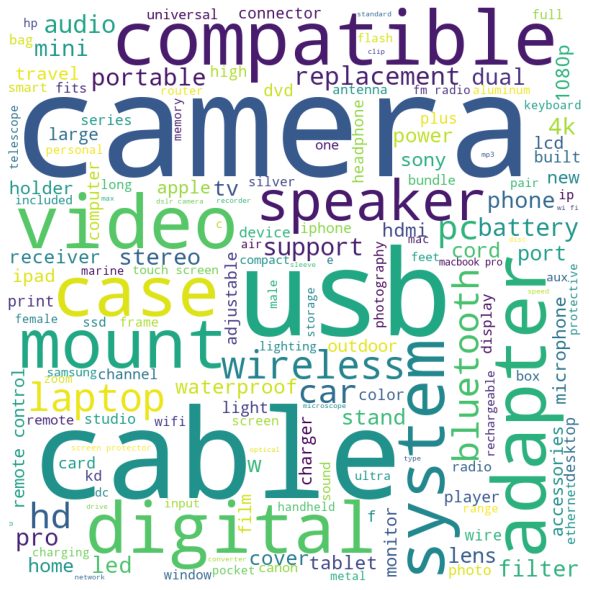

In [11]:
electronics = cat_prods("Electronics")
computer = cat_prods("Computers & Accessories")
camera = cat_prods("Camera & Photo")
prod = np.concatenate((electronics, computer, camera))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(getKeyword(prod))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [12]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
elec_coloring = np.array(Image.open(path.join(d, "Visuals/plug.png")))

In [13]:
color_to_words = {
    # words below will be colored with a black color function
    'blueviolet': ['compatible', 'adapter', 'speaker', 'camera',
                'bluetooth', 'laptop', 'wireless', 'waterproof', 'portable']
}
elec_default_color = 'black'
elec_color_func = GroupedColorFunc(color_to_words, elec_default_color)

In [14]:
electronics = cat_prods("Electronics")
computer = cat_prods("Computers & Accessories")
camera = cat_prods("Camera & Photo")
prod = np.concatenate((electronics, computer, camera))

eleccloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                mask=elec_coloring,
                stopwords = stopwords,
                min_font_size = 10).generate(getKeyword(prod))

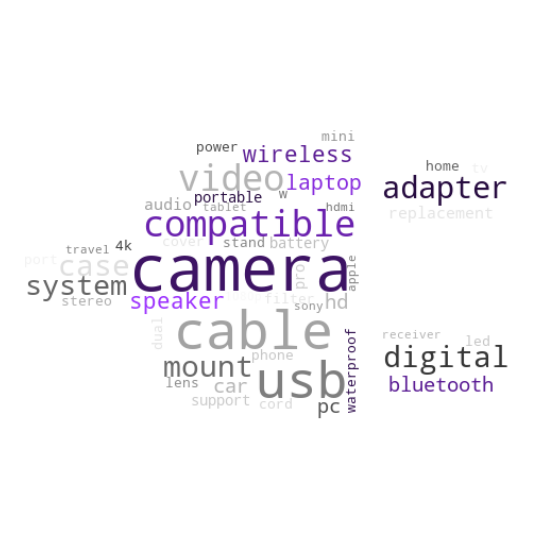

In [15]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(eleccloud.recolor(color_func=elec_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.show()

## Food Word Cloud 

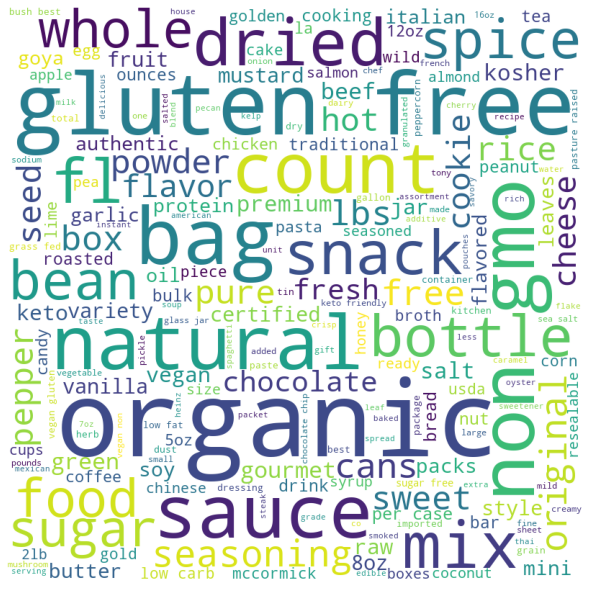

In [16]:
grocery = cat_prods("Grocery & Gourmet Food")
pantry = cat_prods("Pantry Staples")
prod = np.concatenate((grocery, pantry))
#prod = prod.drop_duplicates()

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(getKeyword(prod))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [17]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
food_coloring = np.array(Image.open(path.join(d, "Visuals/spoon.jpeg")))

In [18]:
color_to_words = {
    # words below will be colored with a black color function
    'green': ['organic', 'gluten free', 'natural', 'snack',
                'keto', 'fresh', 'dried']
}
food_default_color = 'black'
food_color_func = GroupedColorFunc(color_to_words, food_default_color)

In [19]:
grocery = cat_prods("Grocery & Gourmet Food")
pantry = cat_prods("Pantry Staples")
prod = np.concatenate((grocery, pantry))

foodcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                mask=food_coloring,
                stopwords = stopwords,
                min_font_size = 10).generate(getKeyword(prod))

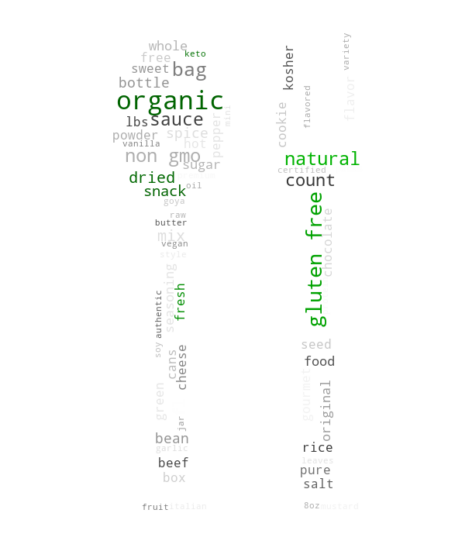

In [20]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(foodcloud.recolor(color_func=food_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.show()

## Home Word Cloud 

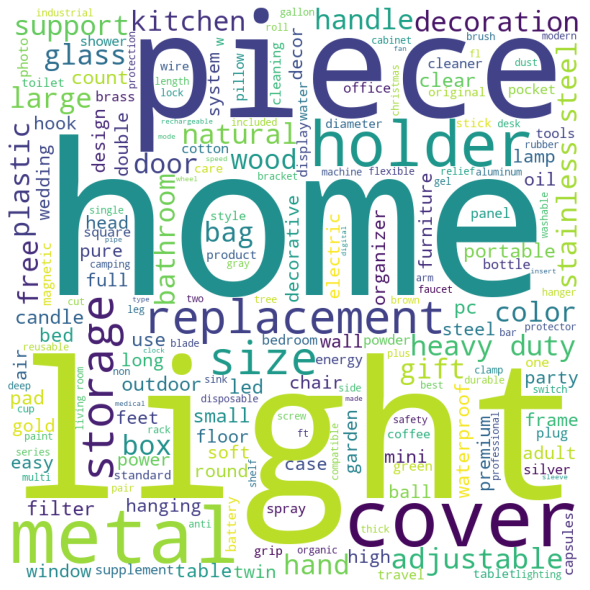

In [21]:
kitchen = cat_prods("Home & Kitchen")
health = cat_prods("Health & Household")
tools = cat_prods("Tools & Home Improvement")
dining = cat_prods("Kitching & Dining")
decor = cat_prods("Home Décor")
prod = np.concatenate((kitchen, health, tools, dining, decor))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(getKeyword(prod))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [22]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
home_coloring = np.array(Image.open(path.join(d, "Visuals/house.png")))

In [23]:
color_to_words = {
    # words below will be colored with a black color function
    'blue': ['heavy duty', 'replacement', 'light', 'adjustable',
                'natural', 'decoration', 'metal', 'stainless steel']
}
home_default_color = 'black'
home_color_func = GroupedColorFunc(color_to_words, home_default_color)

In [24]:
kitchen = cat_prods("Home & Kitchen")
health = cat_prods("Health & Household")
tools = cat_prods("Tools & Home Improvement")
dining = cat_prods("Kitching & Dining")
decor = cat_prods("Home Décor")
prod = np.concatenate((kitchen, health, tools, dining, decor))

homecloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                mask=home_coloring,
                min_font_size = 10).generate(getKeyword(prod))

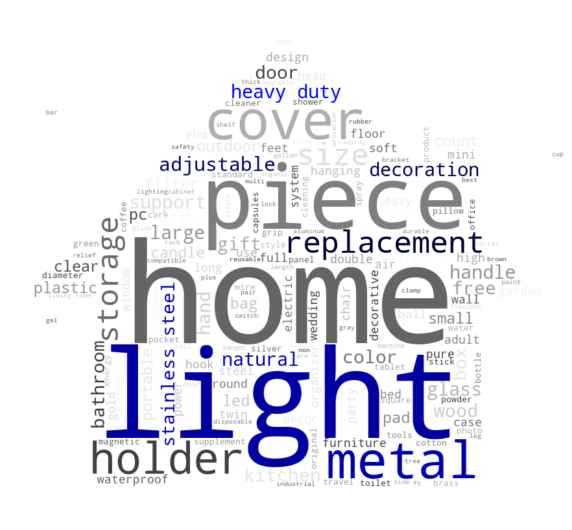

In [25]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(homecloud.recolor(color_func=home_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.show()

## Fashion Word Cloud

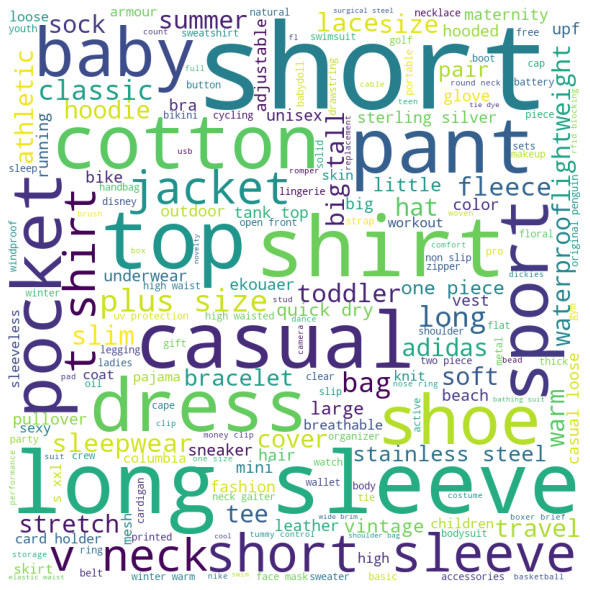

In [26]:
clothes = cat_prods("Clothing")
shoes = cat_prods("Shoes & Jewelry")
beauty = cat_prods("Beauty & Personal Care")
acc = cat_prods("Accessories")
men = cat_prods("Men")
women = cat_prods("Women")
prod = np.concatenate((clothes, shoes, acc, beauty, men, women))
#prod = prod.drop_duplicates()


wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(getKeyword(prod))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [27]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
clothes_coloring = np.array(Image.open(path.join(d, "Visuals/tshirt.jpeg")))

In [28]:
color_to_words = {
    # words below will be colored with a black color function
    'red': ['plus size', 'lightweight', 'card holder', 'pocket',
                'sport', 'sleepwear', 'waterproof', 'summer']
}
clothes_default_color = 'black'
clothes_color_func = GroupedColorFunc(color_to_words, clothes_default_color)

In [29]:
clothes = cat_prods("Clothing")
shoes = cat_prods("Shoes & Jewelry")
beauty = cat_prods("Beauty & Personal Care")
acc = cat_prods("Accessories")
men = cat_prods("Men")
women = cat_prods("Women")
prod = np.concatenate((clothes, shoes, acc, beauty, men, women))

clothescloud = WordCloud(width = 800, height = 800, 
                background_color ='white',
                mask=clothes_coloring,
                stopwords = stopwords,
                min_font_size = 10).generate(getKeyword(prod))

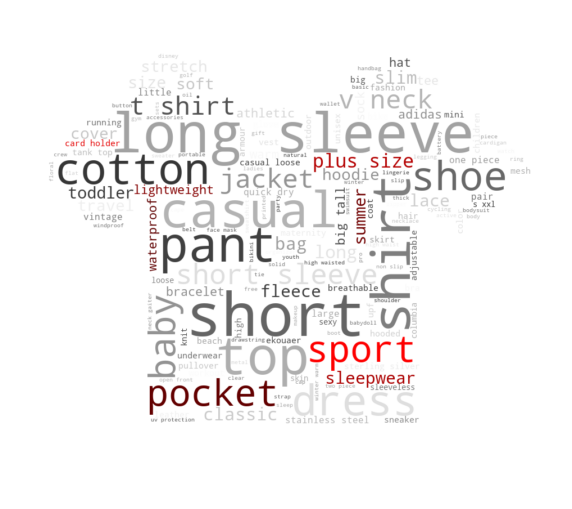

In [30]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(clothescloud.recolor(color_func=clothes_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.show()

## Hardware Word Cloud 

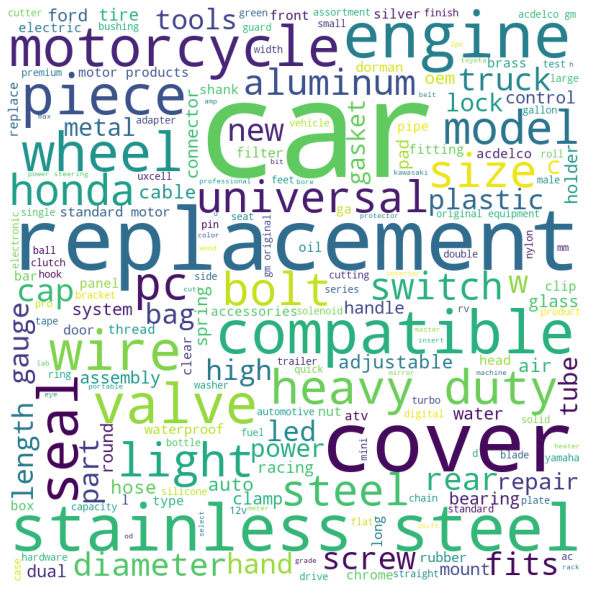

In [31]:
parts = cat_prods("Replacement Parts")
auto = cat_prods("Automotive")
motor = cat_prods("Motorcycle & ATV")
tools = cat_prods("Power & Hand Tools")
industrial = cat_prods("Industrial & Scientific")
prod = np.concatenate((parts, auto, motor, tools, industrial))
#prod = prod.drop_duplicates()

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(getKeyword(prod))

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
  
plt.show()

In [32]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
hw_coloring = np.array(Image.open(path.join(d, "Visuals/apple.png")))

In [33]:
color_to_words = {
    # words below will be colored with a black color function
    'red': ['stainless steel', 'replacement', 'aliminum', 'engine',
                'wheel', 'valve', 'seal', 'motorcycle']
}
hw_default_color = 'black'
hw_color_func = GroupedColorFunc(color_to_words, hw_default_color)

In [34]:
parts = cat_prods("Replacement Parts")
auto = cat_prods("Automotive")
motor = cat_prods("Motorcycle & ATV")
tools = cat_prods("Power & Hand Tools")
industrial = cat_prods("Industrial & Scientific")
prod = np.concatenate((parts, auto, motor, tools, industrial))

hwcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                mask=hw_coloring,
                stopwords = stopwords,
                min_font_size = 10).generate(getKeyword(prod))

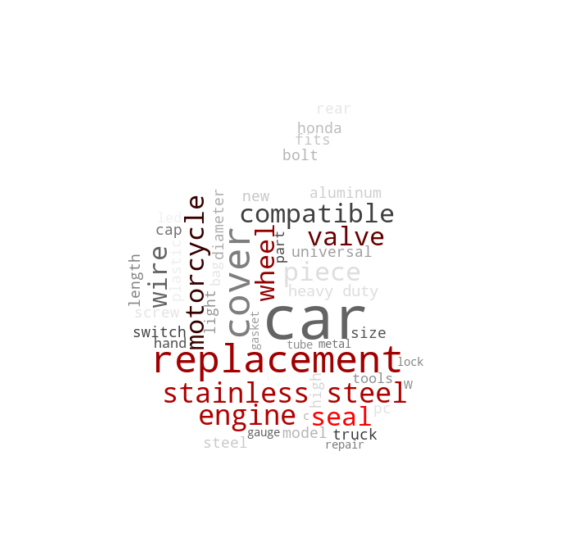

In [35]:
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(hwcloud.recolor(color_func=hw_color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.show()